In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sweetviz as sv
import pandas as pd
df=pd.read_csv('train_clean.csv')
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Output
0,February,30,Lawyer,18859.380,1360.615000,6,4,5640,4,14,...,1,330.26,27.911640,159.000000,Yes,40.292010,59.606647,Low_spent_Large_value_payments,306.162843,1
1,July,39,Writer,46477.560,4059.130000,7,10,24,6,46,...,0,1799.87,32.851676,110.000000,NM,212.248190,109.409292,High_spent_Medium_value_payments,334.255517,0
2,July,52,Mechanic,153147.640,12915.303333,5,4,3,1,3,...,0,1222.96,40.264738,308.000000,No,81.918963,152.908747,High_spent_Medium_value_payments,1306.702624,0
3,March,39,Doctor,16833.105,1542.758750,5,5,4,4,7,...,0,35.71,30.634617,232.000000,No,51.702938,160.069253,Low_spent_Small_value_payments,232.503683,2
4,May,31,Media_Manager,131693.370,10696.447500,0,7,10,3,27,...,0,1428.94,29.807968,267.000000,No,208.858473,1084.704299,Low_spent_Medium_value_payments,56.081978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,April,32,Lawyer,26265.810,2464.817500,3,3,17,4,13,...,0,1259.60,26.158118,221.138208,Yes,46.662502,222.337193,Low_spent_Small_value_payments,267.482055,1
69996,April,39,Accountant,31407.100,2615.258333,7,7,29,8,27,...,0,2949.79,25.757231,77.000000,Yes,115.206873,177.448358,Low_spent_Medium_value_payments,248.870602,0
69997,June,23,Musician,35880.370,3057.030833,4,1,3116,2,0,...,0,117.91,23.163388,255.000000,No,55.680936,135.525187,Low_spent_Large_value_payments,271.203766,2
69998,August,55,Musician,21700.680,1808.390000,5,7,10,0,25,...,0,427.94,26.094638,321.000000,No,212.314493,128.256220,Low_spent_Large_value_payments,332.182780,2


In [5]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Output'],
      dtype='object')

In [6]:
df_obj=[]
df_int=[]
for i in df.columns:
    if df[i].dtype=='object':
        df_obj.append(i)
    else:
        df_int.append(i)

In [7]:
df_int.remove('Output')

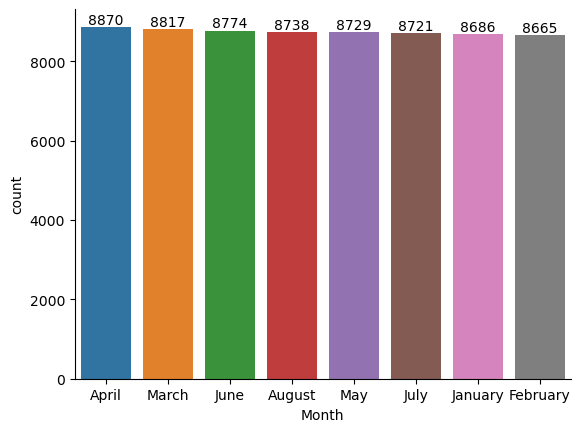

In [8]:
ax=sns.countplot(x=df['Month'],order=df['Month'].value_counts().index)
sns.despine()

for i in ax.containers:
    ax.bar_label(i)

In [9]:
df[df.duplicated()==True].shape[0]

0

In [10]:
l=list(df.nunique())

## Number of Unique Values

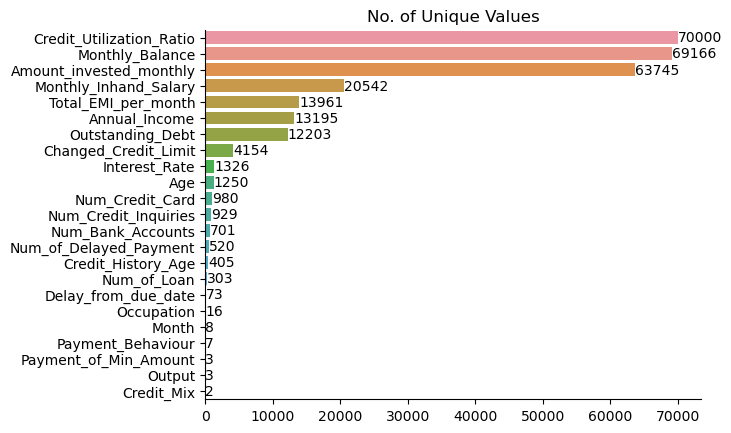

In [11]:
ser=pd.Series(l,index=df.columns)
ser=ser.sort_values(ascending=False)
ax=sns.barplot(x=ser,y=ser.index)
for i in ax.containers:
    ax.bar_label(i)
plt.title('No. of Unique Values')
sns.despine()


## Age Distribution

In [12]:
d={'Less than 0':0,'18-100':0,'More than 100':0}
for i in df['Age']:
    if i <18:
        d['Less than 0']+=1
    elif i in range(18,101):
        d['18-100']+=1
    elif i<0:
        d['Less than 0']+=1
    else:
        d['More than 100']+=1

In [13]:
t=d['Less than 0']+d['More than 100']
print('Number of Abnormal age is',t)

Number of Abnormal age is 5919


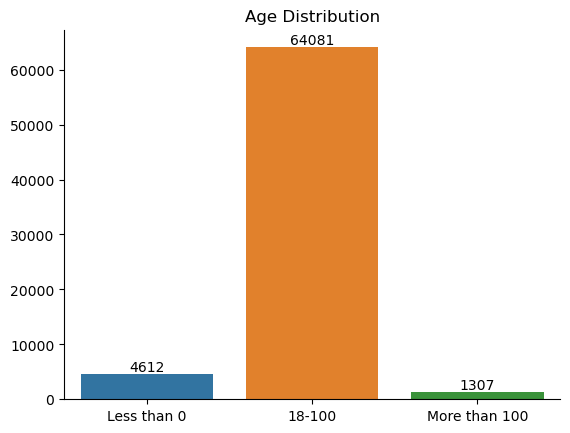

In [14]:
ax=sns.barplot(x=list(d.keys()),y=list(d.values()))
plt.title('Age Distribution')
for i in ax.containers:
    ax.bar_label(i)
sns.despine()

## Occupation

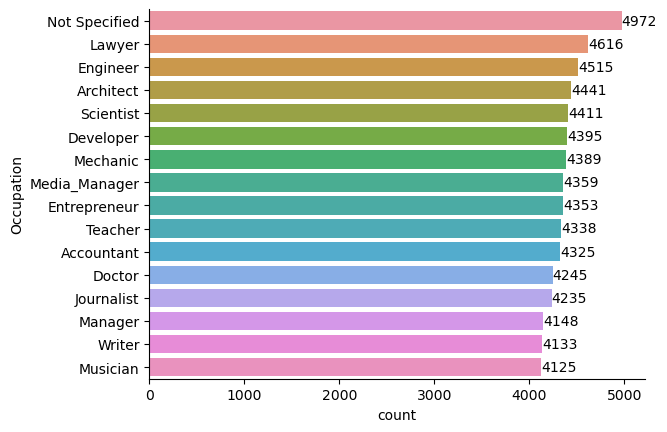

In [15]:
ax=sns.countplot(y=df['Occupation'],order = df['Occupation'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
sns.despine()

## Outliers

In [16]:
cols=[]
out_num=[]
for i in df_int:
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    iqr=q3-q1
    up_lim=q3+1.5*iqr
    lo_lim=q1-1.5*iqr
    c=0
    for j in df[i]:
        if j>up_lim or j<lo_lim:
            c+=1
    if c!=0:
        print("Number of Outliers in {} are {}".format(i,c))
        cols.append(i)
        out_num.append(c)

Number of Outliers in Age are 1925
Number of Outliers in Annual_Income are 1950
Number of Outliers in Monthly_Inhand_Salary are 1468
Number of Outliers in Num_Bank_Accounts are 908
Number of Outliers in Num_Credit_Card are 1561
Number of Outliers in Interest_Rate are 1452
Number of Outliers in Num_of_Loan are 3024
Number of Outliers in Delay_from_due_date are 2799
Number of Outliers in Num_of_Delayed_Payment are 514
Number of Outliers in Changed_Credit_Limit are 851
Number of Outliers in Num_Credit_Inquiries are 1135
Number of Outliers in Outstanding_Debt are 3687
Number of Outliers in Credit_Utilization_Ratio are 3
Number of Outliers in Total_EMI_per_month are 4746
Number of Outliers in Amount_invested_monthly are 7652
Number of Outliers in Monthly_Balance are 5598


Text(0.5, 1.0, 'Number of Outliers')

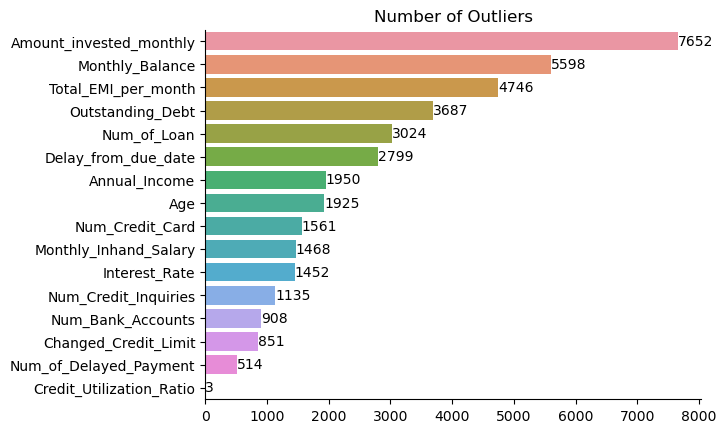

In [17]:
ser1=pd.Series(out_num,index=cols)
ser1=ser1.sort_values(ascending=False)
ax=sns.barplot(y=ser1.index,x=ser1)
for i in ax.containers:
    ax.bar_label(i)
sns.despine()
plt.title('Number of Outliers')

<Axes: xlabel='Annual_Income'>

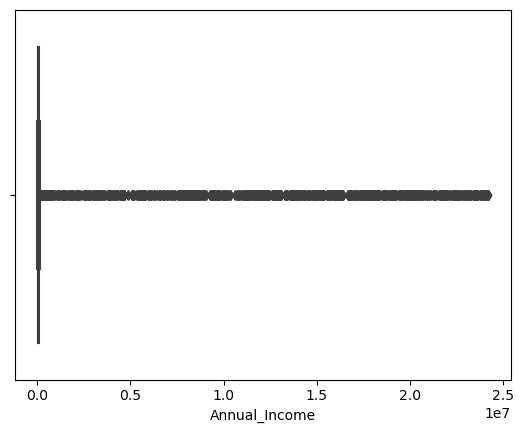

In [17]:
sns.boxplot(x=df['Annual_Income'])

In [18]:
df[df['Num_Bank_Accounts']==df['Num_Bank_Accounts'].min()].shape[0]
print('There are 18 people with -1 number of bank accounts')

There are 18 people with -1 number of bank accounts


In [19]:
t=df[df['Num_Credit_Card']==df['Num_Credit_Card'].min()].shape[0]
print('There are 9 people with 0 credit card')

There are 9 people with 0 credit card


In [20]:
df[df['Interest_Rate']<25].shape[0]

57478

<Axes: >

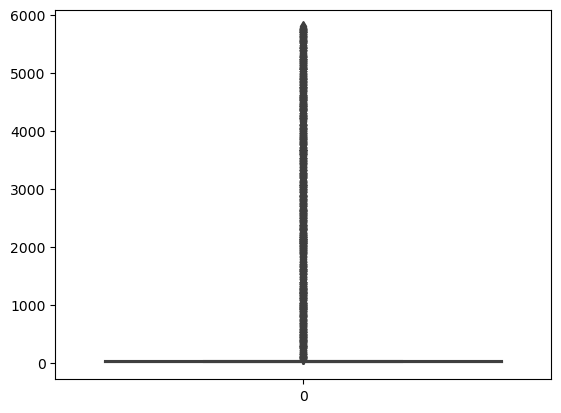

In [21]:
sns.boxplot(df['Interest_Rate'])

In [22]:
df[df['Num_of_Loan']<0].shape[0]

2696

In [23]:
df[df['Delay_from_due_date']<0].shape[0]

400

In [24]:
df[df['Num_of_Delayed_Payment']<0].shape[0]

442

In [25]:
df[df['Changed_Credit_Limit']<0].shape[0]

1107

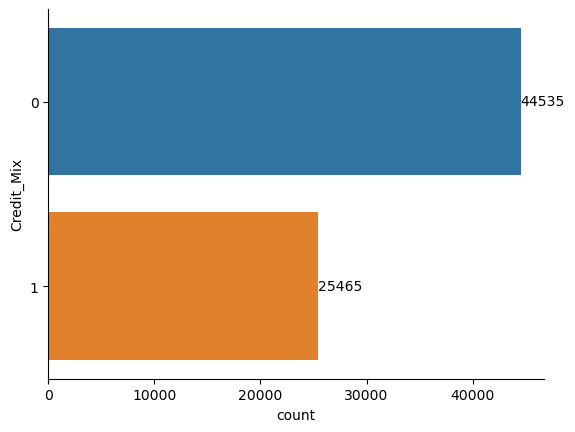

In [26]:
ax=sns.countplot(y=df['Credit_Mix'])
for i in ax.containers:
    ax.bar_label(i)
sns.despine()

<Axes: xlabel='Outstanding_Debt'>

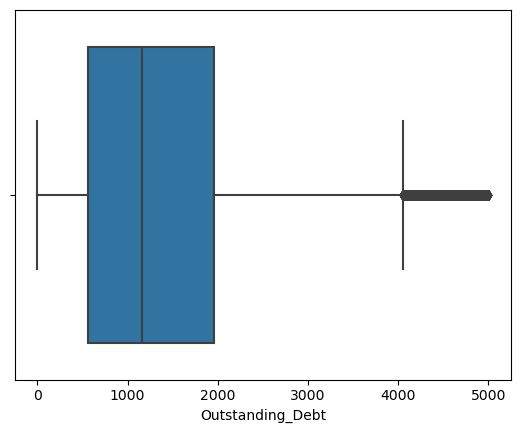

In [27]:
sns.boxplot(x=df['Outstanding_Debt'])

In [28]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Output'],
      dtype='object')

In [29]:
df[df['Credit_Utilization_Ratio']<30].shape[0] #should be as low as possible

25458

In [30]:
def to_cat(i):
    if i==0:
        return 'Poor'
    elif i==1:
        return 'Standard'
    else:
        return 'Good'

In [31]:
df['Output']=df['Output'].apply(to_cat)

In [32]:
def to_cat_cred_util(i):
    if i<30:
        return 'Optimal Utilization'
    else:
        return 'High Utilization'

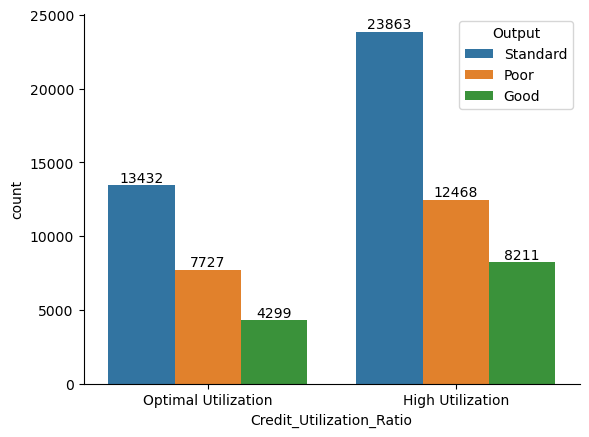

In [33]:
ax=sns.countplot(x=df['Credit_Utilization_Ratio'].apply(to_cat_cred_util),hue=df['Output'])
sns.despine()
for i in ax.containers:
    ax.bar_label(i)

In [34]:
df[df['Num_Credit_Inquiries']<0].shape[0]

0

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

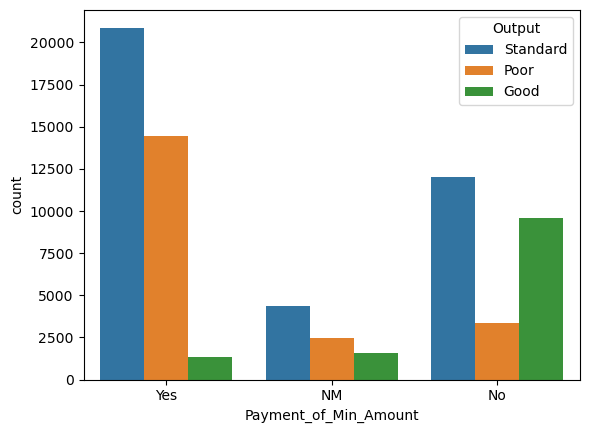

In [35]:
sns.countplot(x=df['Payment_of_Min_Amount'],hue=df['Output'])

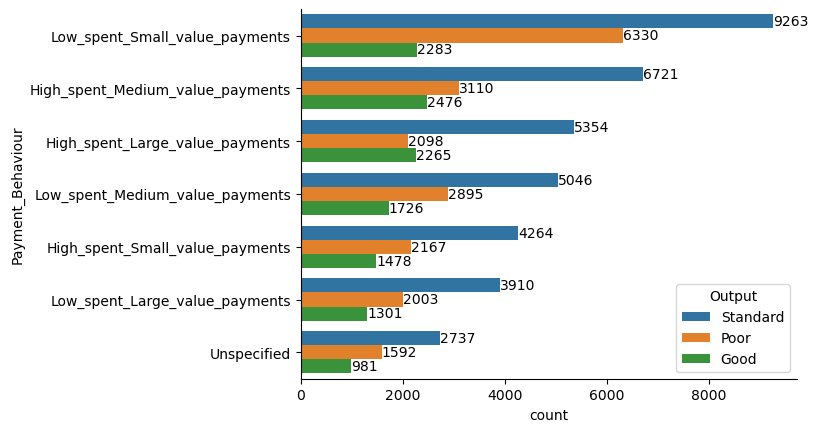

In [36]:
ax=sns.countplot(y=df['Payment_Behaviour'],order=df['Payment_Behaviour'].value_counts().index,hue=df['Output'])
sns.despine()
for i in ax.containers:
    ax.bar_label(i)

In [37]:
s=set()
new_df=df.copy()
for i in df_int:    
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    iqr=q3-q1
    up_lim=q3+1.5*iqr
    lo_lim=q1-1.5*iqr
    for j in range(df[i].shape[0]):
        if df[i][j]<lo_lim or df[i][j]>up_lim:
            s.add(j)

In [38]:
len(s)

28972

In [40]:
df[df['Delay_from_due_date']<0].shape[0]

400

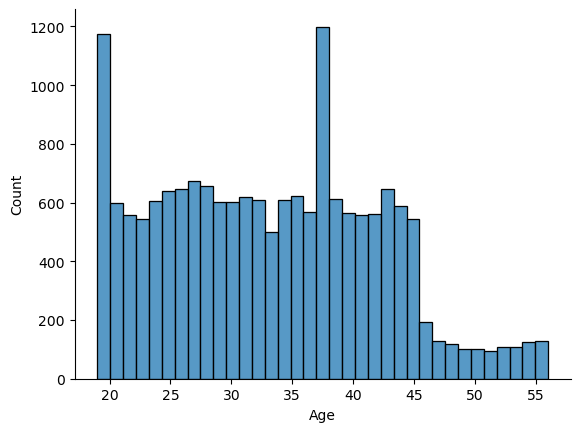

In [41]:
sns.histplot(x=df['Age'][(df['Age']<100)&(df['Output']=='Poor')&(df['Age']>18)])
sns.despine()

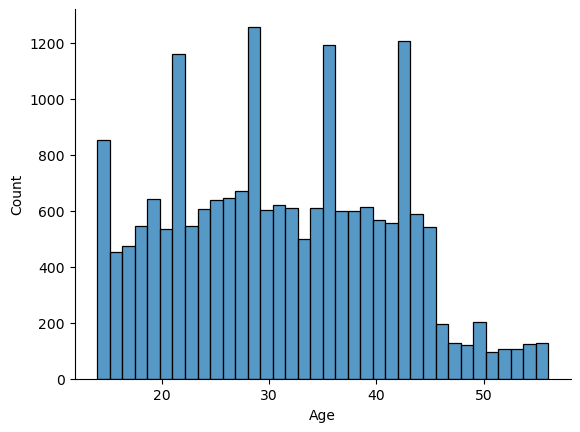

In [42]:
sns.histplot(x=df['Age'][(df['Age']<100)&(df['Output']=='Poor')&(df['Age']>0)])
sns.despine()

In [43]:
df['Age'][(df['Age']<100)&(df['Output']=='Poor')&(df['Age']>0)].value_counts()

Age
27    672
28    655
26    647
43    646
19    641
25    638
35    624
31    620
39    613
34    610
32    609
24    605
29    602
30    601
37    600
38    599
21    599
44    590
36    569
40    566
42    561
22    559
41    557
18    547
23    545
45    543
20    533
33    500
15    473
17    473
16    452
14    380
46    194
47    127
54    124
48    119
53    107
52    107
50    102
49    101
55     99
51     94
56     29
Name: count, dtype: int64

In [44]:
df['Total_EMI_per_month'][(df['Total_EMI_per_month']<150)&(df['Output']=='Poor')&(df['Total_EMI_per_month']>0)].value_counts().sort_values(ascending=True)

Total_EMI_per_month
85.675266     1
111.037636    1
56.856176     1
45.550749     1
127.537569    1
             ..
124.907831    8
58.810598     8
49.266307     8
85.884942     8
77.912934     8
Name: count, Length: 3552, dtype: int64

In [45]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Output'],
      dtype='object')

<Axes: xlabel='Total_EMI_per_month', ylabel='Count'>

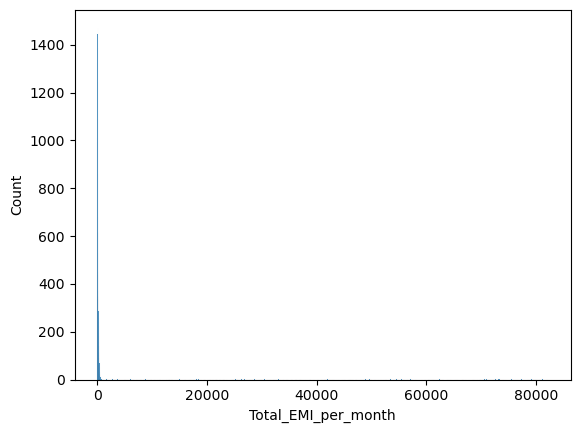

In [46]:
sns.histplot(x=df['Total_EMI_per_month'][df['Output']=='Poor'])

In [47]:
df['Total_EMI_per_month'].median()

69.26845467918113

In [48]:
# Define a custom rounding function
def round_to_multiple_of_5(value):
    return round(value / 5) * 5

# Apply the rounding function to the column 'Total_EMI_per_month'
df['Rounded_EMI'] = df['Total_EMI_per_month'].apply(round_to_multiple_of_5)

# Get the value counts of the rounded EMI values
rounded_emi_counts = df['Rounded_EMI'][(df['Rounded_EMI'] < 150) & (df['Output'] == 'Poor') & (df['Rounded_EMI'] > 0)].value_counts().sort_index()

# Print or do whatever you want with the distribution
print(rounded_emi_counts)


Rounded_EMI
5       62
10     288
15     509
20     701
25     725
30     772
35     724
40     729
45     796
50     764
55     703
60     652
65     650
70     562
75     580
80     468
85     387
90     313
95     380
100    359
105    275
110    336
115    240
120    219
125    265
130    277
135    233
140    255
145    204
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '62'),
  Text(1, 0, '204'),
  Text(2, 0, '219'),
  Text(3, 0, '233'),
  Text(4, 0, '240'),
  Text(5, 0, '255'),
  Text(6, 0, '265'),
  Text(7, 0, '275'),
  Text(8, 0, '277'),
  Text(9, 0, '288'),
  Text(10, 0, '313'),
  Text(11, 0, '336'),
  Text(12, 0, '359'),
  Text(13, 0, '380'),
  Text(14, 0, '387'),
  Text(15, 0, '468'),
  Text(16, 0, '509'),
  Text(17, 0, '562'),
  Text(18, 0, '580'),
  Text(19, 0, '650'),
  Text(20, 0, '652'),
  Text(21, 0, '701'),
  Text(22, 0, '703'),
  Text(23, 0, '724'),
  Text(24, 0, '725'),
  Text(25, 0, '729'),
  Text(26, 0, '764'),
  Text(27, 0, '772'),
  Text(28, 0, '796')])

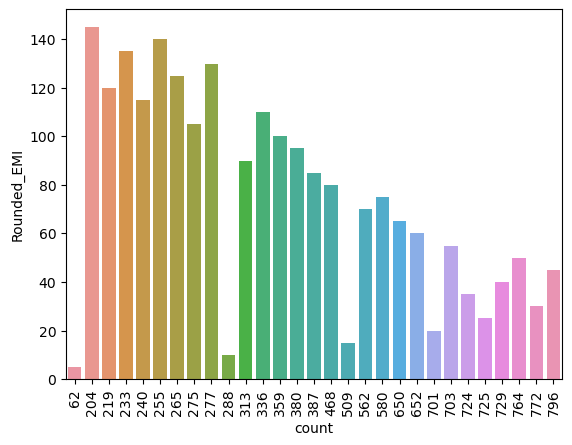

In [49]:
sns.barplot(x=rounded_emi_counts,y=rounded_emi_counts.index)
plt.xticks(rotation=90) 

<Axes: xlabel='Interest_Rate', ylabel='Count'>

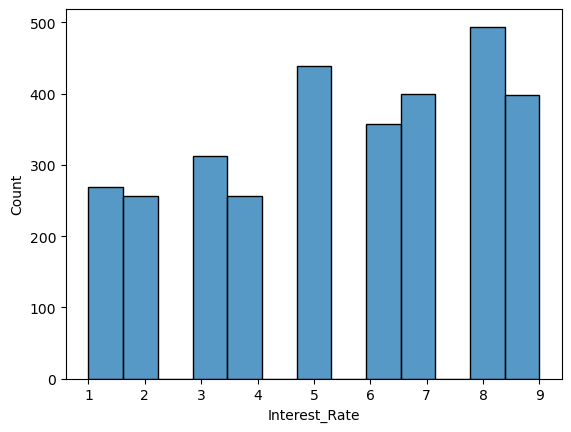

In [50]:
sns.histplot(df['Interest_Rate'][(df['Interest_Rate']<10)&(df['Output']=='Poor')])

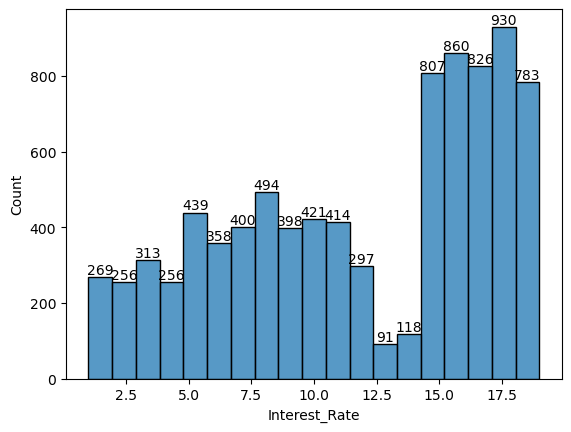

In [51]:
ax=sns.histplot(df['Interest_Rate'][(df['Interest_Rate']<20)&(df['Output']=='Poor')])
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Interest_Rate', ylabel='Count'>

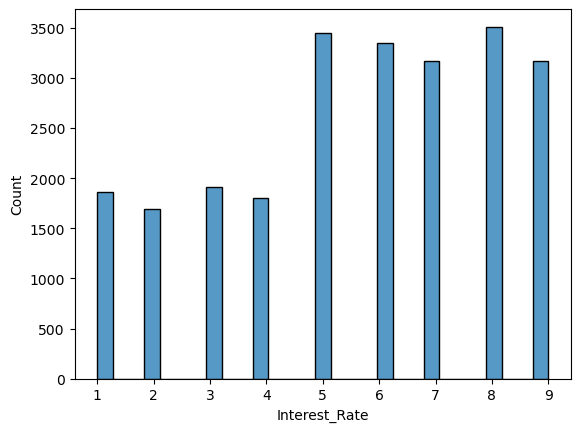

In [52]:
sns.histplot(df['Interest_Rate'][(df['Interest_Rate']<10)])

<Axes: xlabel='Interest_Rate', ylabel='Count'>

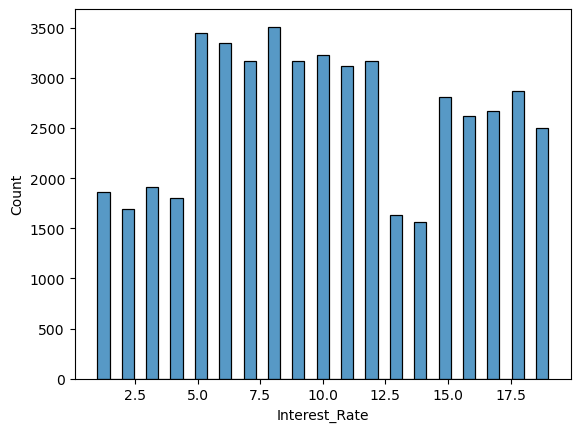

In [53]:
sns.histplot(df['Interest_Rate'][(df['Interest_Rate']<20)])

In [54]:
df[(df['Age']<100) & (df['Age']>0)&(df['Num_Bank_Accounts']!=df['Num_Bank_Accounts'].min())&(df['Num_of_Loan']>=0)&(df['Num_of_Delayed_Payment']>=0)].shape[0]

65018

In [55]:
new_df=df[(df['Age']<100) & (df['Age']>0)&(df['Num_Bank_Accounts']!=df['Num_Bank_Accounts'].min())&(df['Num_of_Loan']>=0)&(df['Num_of_Delayed_Payment']>=0)&(df['Interest_Rate']<=100)]

In [56]:
new_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Output,Rounded_EMI
1,July,39,Writer,46477.560,4059.130000,7,10,24,6,46,...,1799.87,32.851676,110.000000,NM,212.248190,109.409292,High_spent_Medium_value_payments,334.255517,Poor,210
2,July,52,Mechanic,153147.640,12915.303333,5,4,3,1,3,...,1222.96,40.264738,308.000000,No,81.918963,152.908747,High_spent_Medium_value_payments,1306.702624,Poor,80
3,March,39,Doctor,16833.105,1542.758750,5,5,4,4,7,...,35.71,30.634617,232.000000,No,51.702938,160.069253,Low_spent_Small_value_payments,232.503683,Good,50
4,May,31,Media_Manager,131693.370,10696.447500,0,7,10,3,27,...,1428.94,29.807968,267.000000,No,208.858473,1084.704299,Low_spent_Medium_value_payments,56.081978,Standard,210
5,August,33,Entrepreneur,22233.980,1933.831667,5,6,3,4,5,...,1320.47,36.968991,352.000000,No,39.598024,195.695771,Low_spent_Small_value_payments,248.089372,Standard,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,August,35,Mechanic,7749555.000,5774.633333,5,7,9,1,13,...,1004.53,26.990325,269.000000,Yes,51.878854,81.267855,Unspecified,684.316624,Standard,50
69994,April,18,Not Specified,132753.520,10853.793333,5,4,6,3,2,...,1452.83,28.658879,224.000000,No,268.916569,204.733476,High_spent_Large_value_payments,851.729288,Standard,270
69995,April,32,Lawyer,26265.810,2464.817500,3,3,17,4,13,...,1259.60,26.158118,221.138208,Yes,46.662502,222.337193,Low_spent_Small_value_payments,267.482055,Standard,45
69996,April,39,Accountant,31407.100,2615.258333,7,7,29,8,27,...,2949.79,25.757231,77.000000,Yes,115.206873,177.448358,Low_spent_Medium_value_payments,248.870602,Poor,115


In [57]:
df['Interest_Rate'].value_counts()[df['Interest_Rate'].value_counts().index>100]

Interest_Rate
433     3
4396    3
498     3
5078    3
2510    3
       ..
4263    1
3628    1
1434    1
1251    1
3116    1
Name: count, Length: 1278, dtype: int64

In [58]:
df[(df['Interest_Rate']<100)]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Output,Rounded_EMI
1,July,39,Writer,46477.560,4059.130000,7,10,24,6,46,...,1799.87,32.851676,110.000000,NM,212.248190,109.409292,High_spent_Medium_value_payments,334.255517,Poor,210
2,July,52,Mechanic,153147.640,12915.303333,5,4,3,1,3,...,1222.96,40.264738,308.000000,No,81.918963,152.908747,High_spent_Medium_value_payments,1306.702624,Poor,80
3,March,39,Doctor,16833.105,1542.758750,5,5,4,4,7,...,35.71,30.634617,232.000000,No,51.702938,160.069253,Low_spent_Small_value_payments,232.503683,Good,50
4,May,31,Media_Manager,131693.370,10696.447500,0,7,10,3,27,...,1428.94,29.807968,267.000000,No,208.858473,1084.704299,Low_spent_Medium_value_payments,56.081978,Standard,210
5,August,33,Entrepreneur,22233.980,1933.831667,5,6,3,4,5,...,1320.47,36.968991,352.000000,No,39.598024,195.695771,Low_spent_Small_value_payments,248.089372,Standard,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,April,18,Not Specified,132753.520,10853.793333,5,4,6,3,2,...,1452.83,28.658879,224.000000,No,268.916569,204.733476,High_spent_Large_value_payments,851.729288,Standard,270
69995,April,32,Lawyer,26265.810,2464.817500,3,3,17,4,13,...,1259.60,26.158118,221.138208,Yes,46.662502,222.337193,Low_spent_Small_value_payments,267.482055,Standard,45
69996,April,39,Accountant,31407.100,2615.258333,7,7,29,8,27,...,2949.79,25.757231,77.000000,Yes,115.206873,177.448358,Low_spent_Medium_value_payments,248.870602,Poor,115
69998,August,55,Musician,21700.680,1808.390000,5,7,10,0,25,...,427.94,26.094638,321.000000,No,212.314493,128.256220,Low_spent_Large_value_payments,332.182780,Good,210


In [ ]:
new_df.to_csv('Model_data.csv',index=False)